# Analysis of the Employment Scam Aegean Dataset


### Content

* Introduction
* Data description 
* Research objectives
* Data acquisition, cleaning and shaping  
* Data analyzation and visualization 
* Conclusion 

## Introduction

During the COVID-19 global pandemic amount of people working online has dramatically increased. Changes of the way people work caused the changes in the recruitment process, as a result the amount of employment frauds has increased. According to "ActionFraud" about three quarters of job hunters admit they wouldn't recognise the signs of a job scam. Employment scam сan lead to lose of around £4000 on average for job seekers. The following analysis will be focused on determing the sings of employment scam, by analyzing text data, meta-features, frases of job description.

## Data description

The Employment Scam Aegean Dataset is a dataset that contains 17880 real-life job ads published between 2012 and 2014, 17014 of which are legitimate and 866 are fraudulent job ads. Dataset contains the following data:

* Title - The title of the job ad entry.
* Location - Geographical location of the job ad.
* Department - Corporate department (e.g. sales).
* Salary range - Indicative salary range (e.g. \\$50,000-\\$60,000)
* Company profile - A brief company description.
* Description - The details description of the job ad.
* Requirements - Enlisted requirements for the job opening.
* Benefits - Enlisted offered benefits by the employer.
* Telecommuting - True for telecommuting positions.
* Company logo - True if company logo is present.
* Questions	True - if screening questions are present.
* Fraudulent - Classification attribute.
* In balanced - Selected for the balanced dataset.
* Employment type - Full-type, Part-time, Contract, etc.
* Required experience - Executive, Entry level, Intern, etc.
* Required education - Doctorate, Master’s Degree, Bachelor, etc.
* Industry - Automotive, IT, Health care, Real estate, etc.
* Function - Consulting, Engineering, Research, Sales etc.
* Fraudelent - True if company is fraudelent.

## Research objectives
1. Identify the phrases/key wors of legitimate and fraudelent job ads.
2. Define the relationship between companies profile and legetimacy of job ad.
3. Analysis of the relationship between description of required education, requirments and job legetimacy.
4. Identify the relationship between location and job legetimacy.

## Data acquisition, cleaning and shaping  

In [1]:
# Import all dependencies that will be used
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pygal
from pygal.style import BlueStyle
from pygal.style import Style
import csv
import pprint
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
import re,string,unicodedata 
import unicodedata
from string import punctuation 
from IPython.display import display, HTML
base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

## nltk.download('averaged_perceptron_tagger') - download averaged_perceptron_tagger
## nltk.download('punkt') - download punkt
## nltk.download('wordnet') - download wordnet
## nltk.download('stopwords') - download stopwords

In [2]:
# Extracting data from csv file
data = pd.read_csv("fake_job_postings.csv")
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
# Checking amount of not-null values in each column
data_not_null = abs(data.isnull().sum() - len(data.index))
barChart = pygal.Bar(height=450, style=BlueStyle)
barChart.title = "Amount of not-null values in each column"
[barChart.add(x[0], x[1]) for x in data_not_null.items()]
display(HTML(base_html.format(rendered_chart=barChart.render(is_unicode=True))))

Columns 'salary_range' and 'department' have less than half of values, so they can be removed 

In [4]:
# Separating column location to columns city and country
data['country'] = data['location'].str.split(', ').str.get(0)
data['city'] = data['location'].str.split(', ').str.get(2)
# Remove unnecessary columns
data.pop('department')
data.pop('location')
data.pop('job_id')
data.pop('salary_range')
data.head()

,title,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,city
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US,New York
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ,Auckland
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,US,Wever
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,Washington
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,Fort Worth


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   company_profile      14572 non-null  object
 2   description          17879 non-null  object
 3   requirements         15185 non-null  object
 4   benefits             10670 non-null  object
 5   telecommuting        17880 non-null  int64 
 6   has_company_logo     17880 non-null  int64 
 7   has_questions        17880 non-null  int64 
 8   employment_type      14409 non-null  object
 9   required_experience  10830 non-null  object
 10  required_education   9775 non-null   object
 11  industry             12977 non-null  object
 12  function             11425 non-null  object
 13  fraudulent           17880 non-null  int64 
 14  country              17534 non-null  object
 15  city                 17440 non-null  object
dtypes: i

In [6]:
# Rearranging the order of columns
columns = data.columns.tolist()
order = [0, 1, 14, 15, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
columns = [columns[i] for i in order]
data = data[columns]

In [7]:
## Clean data from duplicates and NaN value in columns title or country
data.drop_duplicates()
data.dropna(subset=['title', 'country'])

,title,company_profile,country,city,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...",US,New York,"Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",NZ,Auckland,Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,US,Wever,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,US,Washington,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,US,Fort Worth,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,Vend is looking for some awesome new talent to...,CA,Toronto,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,Payroll Accountant,WebLinc is the e-commerce platform and service...,US,Philadelphia,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,We Provide Full Time Permanent Positions for m...,US,Houston,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,Graphic Designer,NaN,NG,Lagos,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


## Data analysis

Before answering the questions it is important to define the ratio between fraudulent and legetimate job postings. In order to make it more clear, this ration can be visualized by using pie chart

In [8]:
pie_chart = pygal.Pie(inner_radius = 0.35, height = 300)
pie_chart.title = 'Amount of legetimate and fraudulent job_postings'
pie_chart.add('legetimate', data["fraudulent"].value_counts()[0])
pie_chart.add('fraudulent', data["fraudulent"].value_counts()[1])
display(HTML(base_html.format(rendered_chart=pie_chart.render(is_unicode=True))))

Distribution of legetimate and fraudulent job postings is imbalanced. About 95% are real job postings, 5% are fake job postings. Due to the such imbalance in sample, model should be created and evaluated correctly by the usage of sufficient methods.

### Q1: Identifying the phrases/key words of legitimate and fraudelent job ads.
The first objective of this reseach is to identify the phrases and key words of legitimate and fraudelent job ads. To do this the 'company_profile', 'description', 'requirements', 'benefits' columns should be joined into one column. Then in this column phrases should be defined. To do this, all words should lemmatized, and splitted into phrases by using stop words and stop signs. Then the frequency of phrases can be visualized by using Word Clouds and matplotlib.  

In [9]:
data['company_profile'].fillna(" ", inplace = True)
data['description'].fillna(" ", inplace = True)
data['requirements'].fillna(" ", inplace = True)
data['benefits'].fillna(" ", inplace = True)
data['information'] = data['company_profile'] + ' ' + data['description'] + ' ' + data['requirements'] + ' ' + data['benefits']
data.head()

,title,company_profile,country,city,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,information
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...",US,New York,"Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,NaN,NaN,Marketing,0,"We're Food52, and we've created a groundbreaki..."
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",NZ,Auckland,Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,"90 Seconds, the worlds Cloud Video Production ..."
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,US,Wever,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,NaN,NaN,NaN,NaN,NaN,0,Valor Services provides Workforce Solutions th...
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,US,Washington,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,Our passion for improving quality of life thro...
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,US,Fort Worth,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,SpotSource Solutions LLC is a Global Human Cap...


In [10]:
## defining stopwords and stopsigns
stop = set(stopwords.words('english')) 
stop.update(set(string.punctuation))

In [11]:
## define function for defining part of speec
def get_wordnet_part_of_speech(word):
    word_dict = {"J": wordnet.ADJ,
                 "N": wordnet.NOUN,
                 "V": wordnet.VERB,
                 "R": wordnet.ADV}

    return word_dict.get(word, wordnet.NOUN)

In [13]:
## implementiog WordNetLemmatizer function for job posting case
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    lemmatized_text = []
    for i in nltk.word_tokenize(text):
        if i.strip().lower() not in stop:
            part_of_speech = pos_tag([i.strip()])
            word = lemmatizer.lemmatize(i.strip(), get_wordnet_part_of_speech(part_of_speech[0][1]))
            lemmatized_text.append(word.lower())
    return " ".join(lemmatized_text)  

In [21]:
data.information = data.information.apply(lemmatize_words)

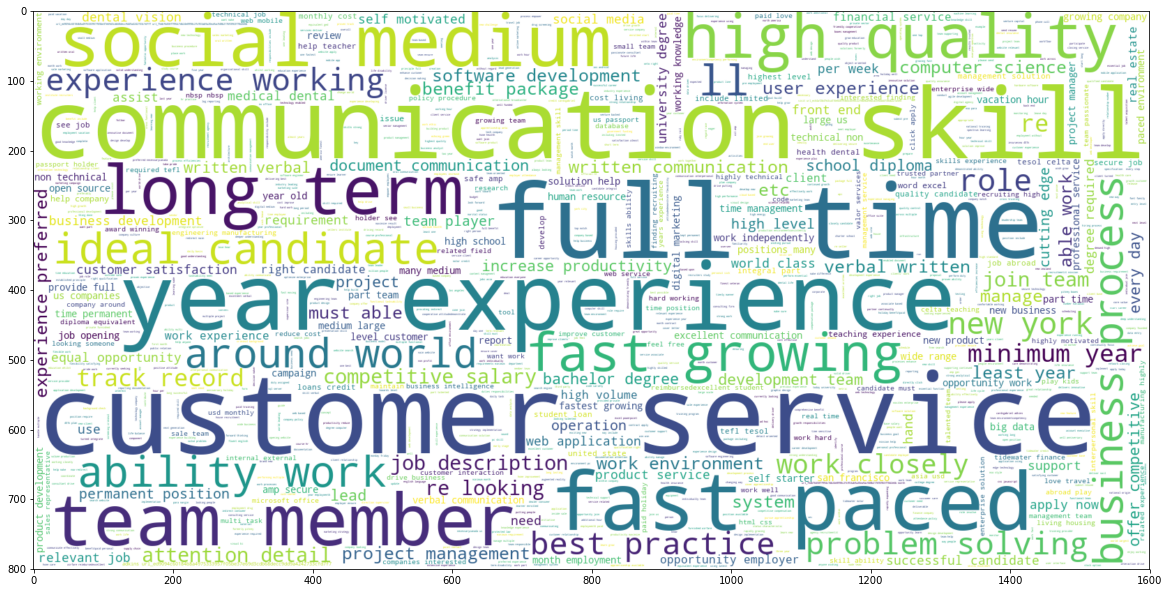

In [30]:
## wordCloud for information in not frauulent job postings(fraudelent column is 0)
plt.figure(figsize = (20,20))
wc = WordCloud(width = 1600 , height = 800 , 
               max_words = 1000,
               background_color ='white',).generate(" ".join(data[data.fraudulent == 0].information))
plt.imshow(wc , interpolation = 'bilinear')

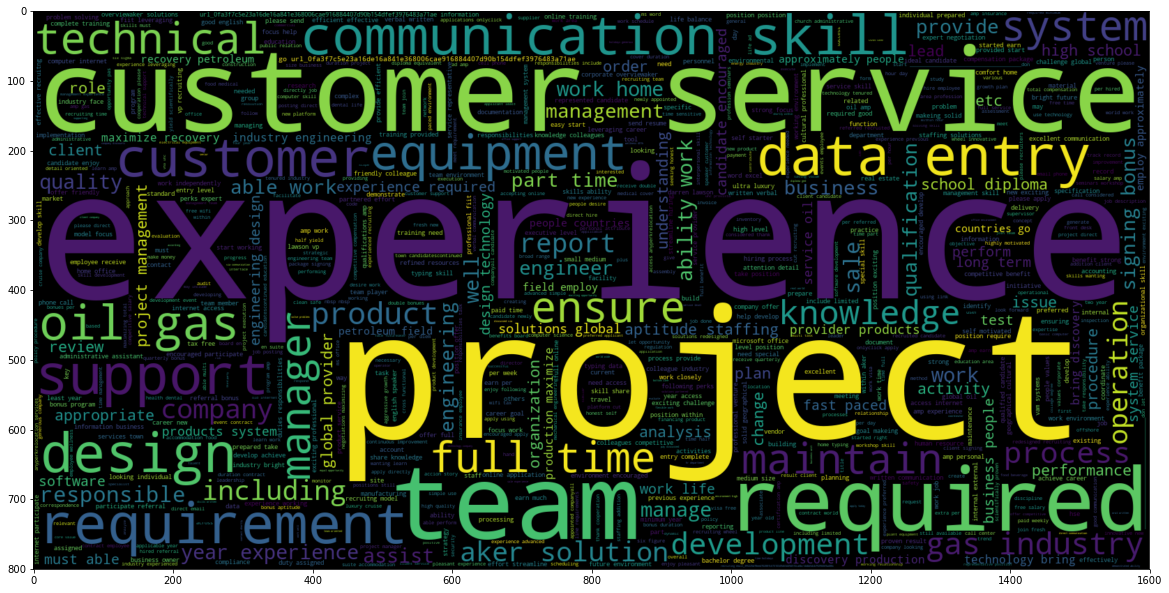

In [31]:
## wordCloud for information in not frauulent job postings(fraudelent column is 0)
plt.figure(figsize = (20,20)) # Text that is fraudulent(1)
wc = WordCloud(width = 1600 , height = 800 , 
               max_words = 1000,
               background_color ='black',).generate(" ".join(data[data.fraudulent == 1].information))
plt.imshow(wc , interpolation = 'bilinear')

From the word clouds some patterns can be observed. In fraudelent job postings the most common words are "experience" and "project", while in legetimate job postings most common phrases are related to job description and requirments, such as "communication skills", "full time", "year experience", "customer service".

### Q2: Define the relationship between companies profile and legetimacy of job ad.

In order to define the relationship between company profile and job legitimacy bar chars will be plotted. Graph will contain two series of bar chars, for fraudelent and legetimate job postings. Bar plots will simply show if there are any description of company in each case. Additionally, the existance of logo will be plotted in the same way.

In [12]:
## using the lambda function to add new column which contains information about existance of company profile.
data['has_profile'] = data['company_profile'].apply(lambda x: 0 if x == " " else 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   company_profile      17880 non-null  object
 2   country              17534 non-null  object
 3   city                 17440 non-null  object
 4   description          17880 non-null  object
 5   requirements         17880 non-null  object
 6   benefits             17880 non-null  object
 7   telecommuting        17880 non-null  int64 
 8   has_company_logo     17880 non-null  int64 
 9   has_questions        17880 non-null  int64 
 10  employment_type      14409 non-null  object
 11  required_experience  10830 non-null  object
 12  required_education   9775 non-null   object
 13  industry             12977 non-null  object
 14  function             11425 non-null  object
 15  fraudulent           17880 non-null  int64 
 16  info

In [13]:
# defining amount of fake and real job postings grouped by existance of profile and company logo
total_fraudulent = data["fraudulent"].value_counts()
fra_logo = data.groupby('fraudulent')['has_company_logo'].sum()
fra_profile = data.groupby('fraudulent')['has_profile'].sum()

In [14]:
## creating 2 two dimensional arrays which contain data for bar charts
graph_data1 = [[total_fraudulent[0] - fra_profile[0], fra_profile[0]], 
               [total_fraudulent[1] - fra_profile[1], fra_profile[1]]]
graph_data2 = [[total_fraudulent[0] - fra_logo[0], fra_logo[0]], 
               [total_fraudulent[1] - fra_logo[1], fra_logo[1]]]

In [15]:
## code for defining and rendering bar charts
barChart = pygal.Bar(height=300)
barChart.title = 'Existance of company profile in job postings'
barChart.x_labels = 'no_company_profile', 'has_company_profile'

barChart.add('legetimate', [graph_data1[0][0], graph_data1[0][1]]) 
barChart.add('fraudulent', [graph_data1[1][0], graph_data1[1][1]])
display(HTML(base_html.format(rendered_chart=barChart.render(is_unicode=True))))

barChart = pygal.Bar(height=300)
barChart.title = 'Existance of company logo in job postings'
barChart.x_labels = 'no_company_logo', 'has_company_logo'

barChart.add('legetimate', [graph_data2[0][0], graph_data2[0][1]]) 
barChart.add('fraudulent', [graph_data2[1][0], graph_data2[1][1]])
display(HTML(base_html.format(rendered_chart=barChart.render(is_unicode=True))))

From the barCharts some pattern can be observed. Most of fraudelent job postings have not neither company profile(about 2/3 of all job postings), neither company logo. On the other hand legetimate job postings in most cases have job postings and company logo(about 85 percent of all legetimate job postings). 

## Q3: Analysis of the relationship between description of required education, requirments and job legetimacy.

Analysis of string length of education column can be done by the usage of Line graph. Axis will contain two graphs for fraudulent and legetimate job postings. By using bar charts amount of distinct values in education column can be obtained. Distribution of length of requirments will be visualezed by using box plot.

In [51]:
## defining length of required education column of fake and real job postings
education_fraud_length = data[data["fraudulent"]==1]['required_education'].str.len().value_counts().sort_index()
education_leg_length = data[data["fraudulent"]==0]['required_education'].str.len().value_counts().sort_index()

## code for defining and rendering line graph
line = pygal.Line(title = 'String length of required education column',
                  x_title = 'amount of characters in required_education column', 
                  y_title = 'amount of values',
                  height = 350)
line.x_labels = (education_leg_length.index)
line.add('fake', education_fraud_length)
line.add('real', education_leg_length, secondary = True)
display(HTML(base_html.format(rendered_chart=line.render(is_unicode=True))))

In [17]:
## grouping data by required education and fraudulence  
fra_required_education = data.groupby('fraudulent')['required_education'].value_counts()

## sorting grouped data by inxexes
fra_required_education[0].sort_index()
fra_required_education[1].sort_index()

## changing the size of titles of axis.
style = Style(
title_font_size = 14)

## code for defining and rendering bar charts
barChart = pygal.Bar(height=400, x_label_rotation=30, style = style)
barChart.title = 'Required education'
barChart.y_title = 'Amount of postings'
barChart.x_labels = fra_required_education[0].index

barChart.add('legetimate', fra_required_education[0]) 
barChart.add('fraudulent', fra_required_education[1])
display(HTML(base_html.format(rendered_chart=barChart.render(is_unicode=True))))


In [53]:
## defining the lenght of requirments column for real and fake job postings.
req_fraud_length = data[data["fraudulent"]==1]['requirements'].str.len().value_counts().sort_index()
req_leg_length = data[data["fraudulent"]==0]['requirements'].str.len().value_counts().sort_index()

## code for defining and rendering box plots 
box = pygal.Box(title = 'Box plot for length of requirments column',
                  y_title = 'Amount of characters',
                  height = 450)
box.add('fake', req_fraud_length)
box.add('real', req_leg_length)
display(HTML(base_html.format(rendered_chart=box.render(is_unicode=True))))

 Real and fake job postings relatively have precisely the same amount of characters in required education column. In both fake and real job postings post creater asks for bachelor degree and high school certeficate, but in fake job postings, there ususally no need in additional certificates. Real job postings usually has more characters in requirments column(Q2 in real equal to 99 characters, Q2 in fake equal to 19.5 characters), which means that the probability of legetimacy of job increases, as amount of characters in requirments column increases.  

## Q4: Identify the relationship between location and job legetimacy.

The distribution of fake job postings by its location can be obtained from solidGauge. Data in main dataset contains only information about countries. To get continet where countrty located, other dataset with countries and continets should be used. Data from 2 datasets can be joined, by mapping column country which consists in both datasets to column continet in newly uptained dataset. Then data can be visualized. 

In [19]:
##importing csv file that contains name of continent and country code
country_continent = pd.read_csv("country-and-continent-codes-list.csv")
country_continent.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


In [20]:
## removing unnecesarry data from dataframe
country_continent.pop('Continent_Code')
country_continent.pop('Country_Name')
country_continent.pop('Three_Letter_Country_Code')
country_continent.pop('Country_Number')
country_continent.info()

## creating a dictionary for country code as index and  continent name as value
dict_list = pd.Series(country_continent.Continent_Name.values, 
                      index = country_continent.Two_Letter_Country_Code).to_dict()

## adding new column by mapping country to continent
data['continent'] = data['country'].map(dict_list)
data.head()

## grouping data and counting values of continent column
fra_continent = data.groupby('fraudulent')['continent'].value_counts()
fra_continent


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Continent_Name           262 non-null    object
 1   Two_Letter_Country_Code  261 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


fraudulent  continent    
0           North America    10411
            Europe            4697
            Asia               894
            Oceania            507
            Africa             457
            South America       48
1           North America      742
            Oceania             40
            Asia                34
            Europe              28
            Africa              21
            South America        1
Name: continent, dtype: int64

In [49]:
## code for defining and rendering solidGauge 
style = Style(
legend_font_size = 12)

gauge = pygal.SolidGauge(inner_radius=0.70, height=350, width=700, style = style)

gauge.add('fake in North America', [{'value': fra_continent[1][0], 'max_value': fra_continent[0][0] + fra_continent[1][0]}])
gauge.add('fake in Europe', [{'value': fra_continent[1][3], 'max_value': fra_continent[0][1] + fra_continent[1][3]}])
gauge.add('fake in Asia', [{'value': fra_continent[1][2], 'max_value': fra_continent[0][2] + fra_continent[1][2]}])
gauge.add('fake in Oceania', [{'value': fra_continent[1][1], 'max_value': fra_continent[0][3] + fra_continent[1][1]}])
gauge.add('fake in Africa', [{'value': fra_continent[1][4], 'max_value': fra_continent[0][4] + fra_continent[1][4]}])
gauge.add('fake in South America', [{'value': fra_continent[1][5], 'max_value': fra_continent[0][5] + fra_continent[1][5]}])

display(HTML(base_html.format(rendered_chart=gauge.render(is_unicode=True))))

## SolidGauge in pygal does not have title attribute

Solidgauge shows that relatively fake job postings more ofthen can be found in North America and Oceania, the lowest probability of facing a fake job postings is in Europe.

## Conclusion

Analysis of the fraudulent and real job postings helped to obtain some patterns:

Firstly, according to this in most cases fake job postings have less information about company itselt. However, in general fake and real job postings have simmilar requirments for education, but in legetimate job postings position requirments usually contain more information.

Secondly, this sample shows that real and fake job postings do not distributed equally by location. The highest probability of finding fake job is in North America and Oceania, while lowest probability is in Europe.

Thirdly, fraudulent and legetimate job postings have different mostly occured key pharases. By using key phrases model for learning and testing can be created. But this model can be biased, because distribution of fake and real job postings is imbalanced (about 95% percent of all job postings are real one, while the remaining 5% are fake). In order to check correctness of distribution larger dataset should be taken or several datasets from different sources can be taken.